# ***Churn Prediction Project***
         

# Importing used libraries

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

In [2]:
df = pd.read_csv("telecom_customer_churn.csv")

In [3]:
df.head(20)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

### Dropping Unwanted Columns

In [5]:
df.drop(['Customer ID','Churn Category','Churn Reason',
         'Total Refunds','Zip Code','Longitude','Latitude','City'],axis=1, inplace = True)

In [6]:
df

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,...,Yes,One Year,Yes,Credit Card,65.60,593.30,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,...,No,Month-to-Month,No,Credit Card,-4.00,542.40,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,...,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,0,13,Offer D,Yes,46.68,No,...,Yes,One Year,No,Credit Card,55.15,742.90,0,606.84,1349.74,Stayed
7039,Male,40,Yes,0,1,22,Offer D,Yes,16.20,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0,356.40,2230.10,Churned
7040,Male,22,No,0,0,2,Offer E,Yes,18.62,No,...,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0,37.24,129.99,Joined
7041,Male,21,Yes,0,5,67,Offer A,Yes,2.12,No,...,Yes,Two Year,No,Credit Card,67.85,4627.65,0,142.04,4769.69,Stayed


### Visualizing Missing Values

<AxesSubplot:>

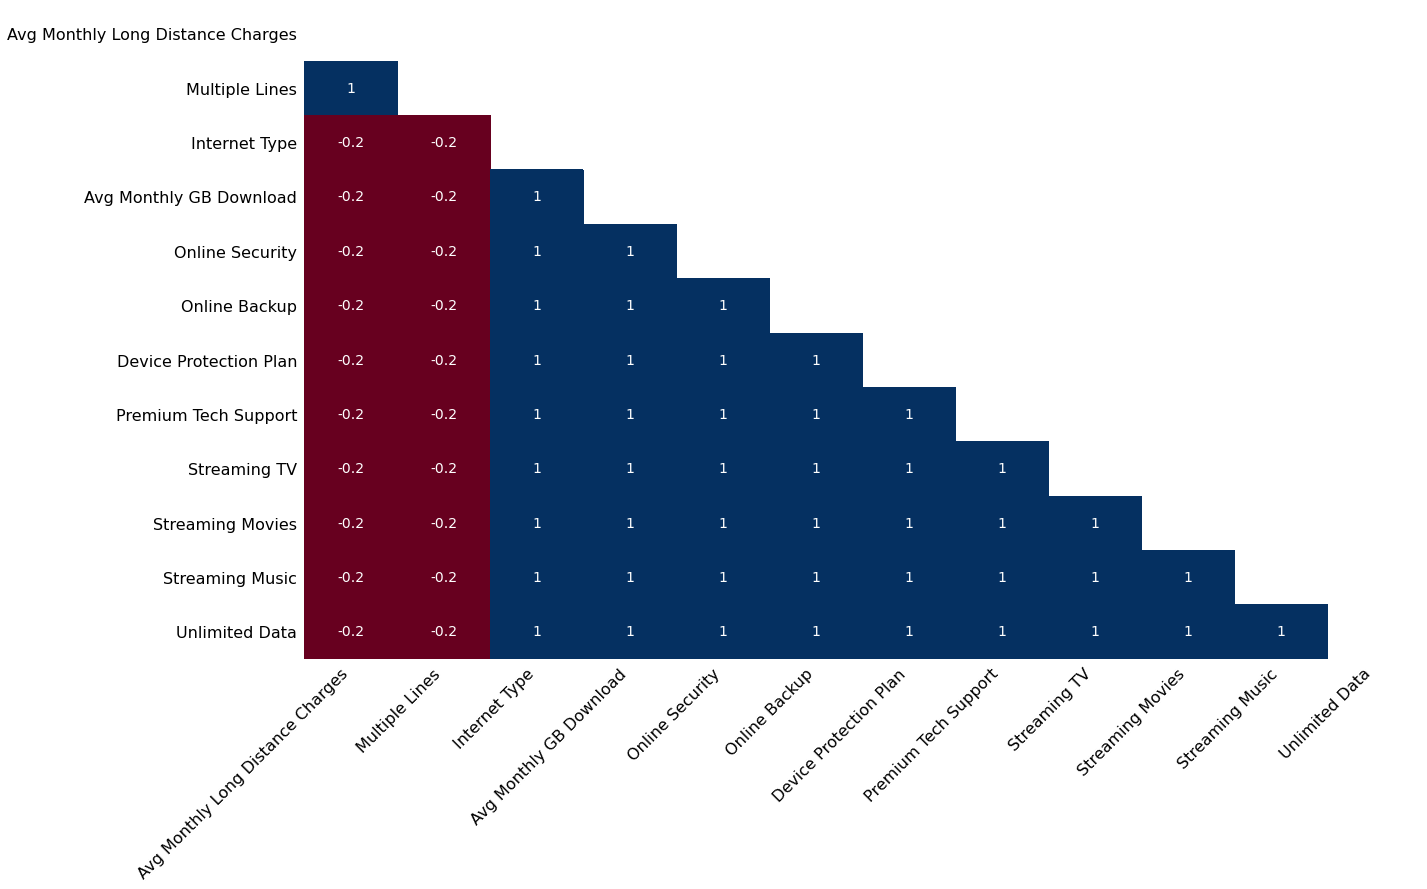

In [7]:
msno.heatmap(df)

<AxesSubplot:>

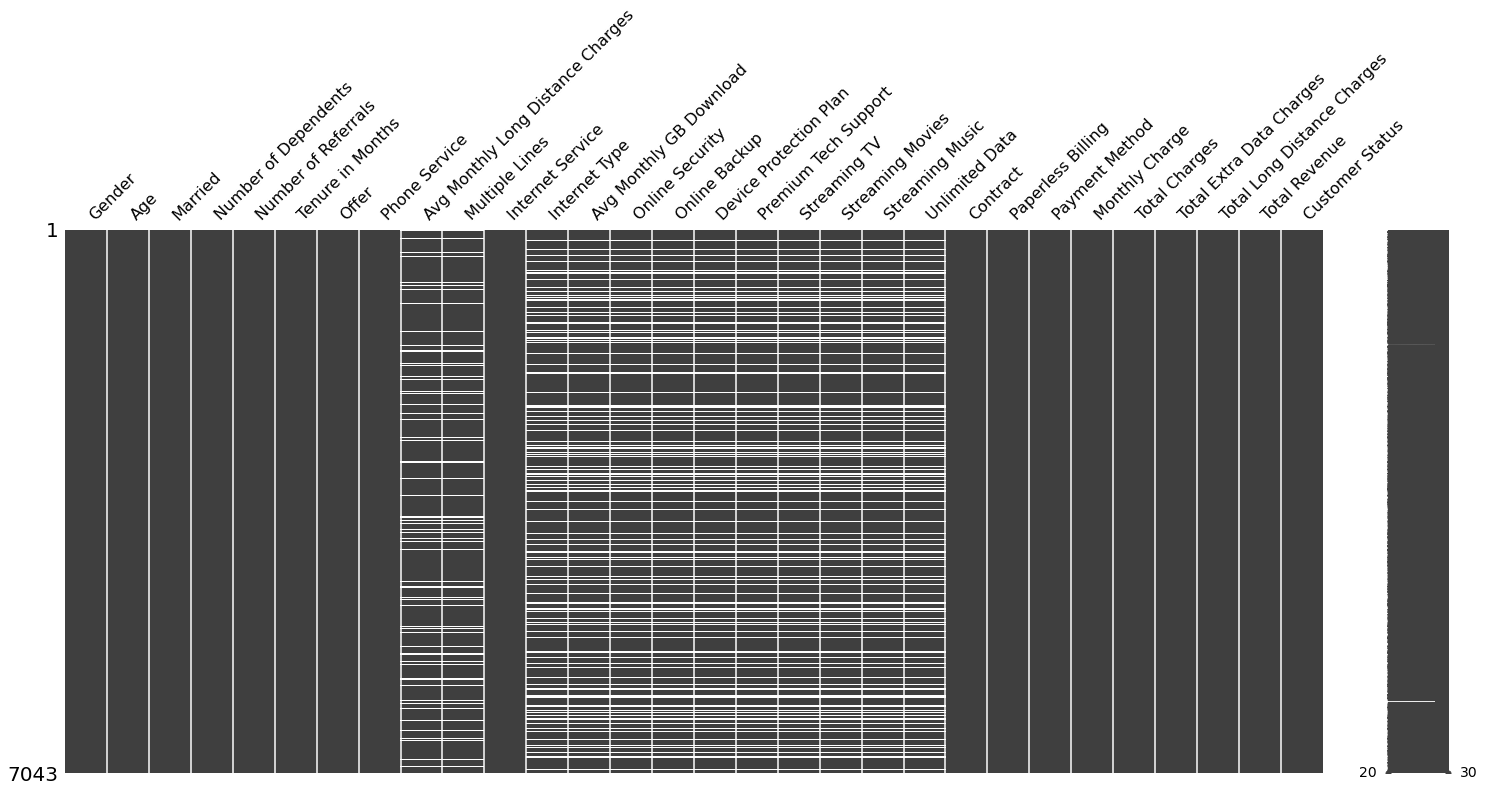

In [8]:
msno.matrix(df)

In [9]:
missing_values = list(df.isna().sum())
# missing values is a list of the number of missing values in each column

cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Making a custom dataframe from dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
Missing Values,0,682,682,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526


### Handling missing values using the ffill method

In [10]:
df.fillna(method='ffill', inplace=True)

In [11]:
missing_values = list(df.isna().sum())
# missing values is a list of the number of missing values in each column

cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Making a custom dataframe from dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others
Missing Values,0


<AxesSubplot:>

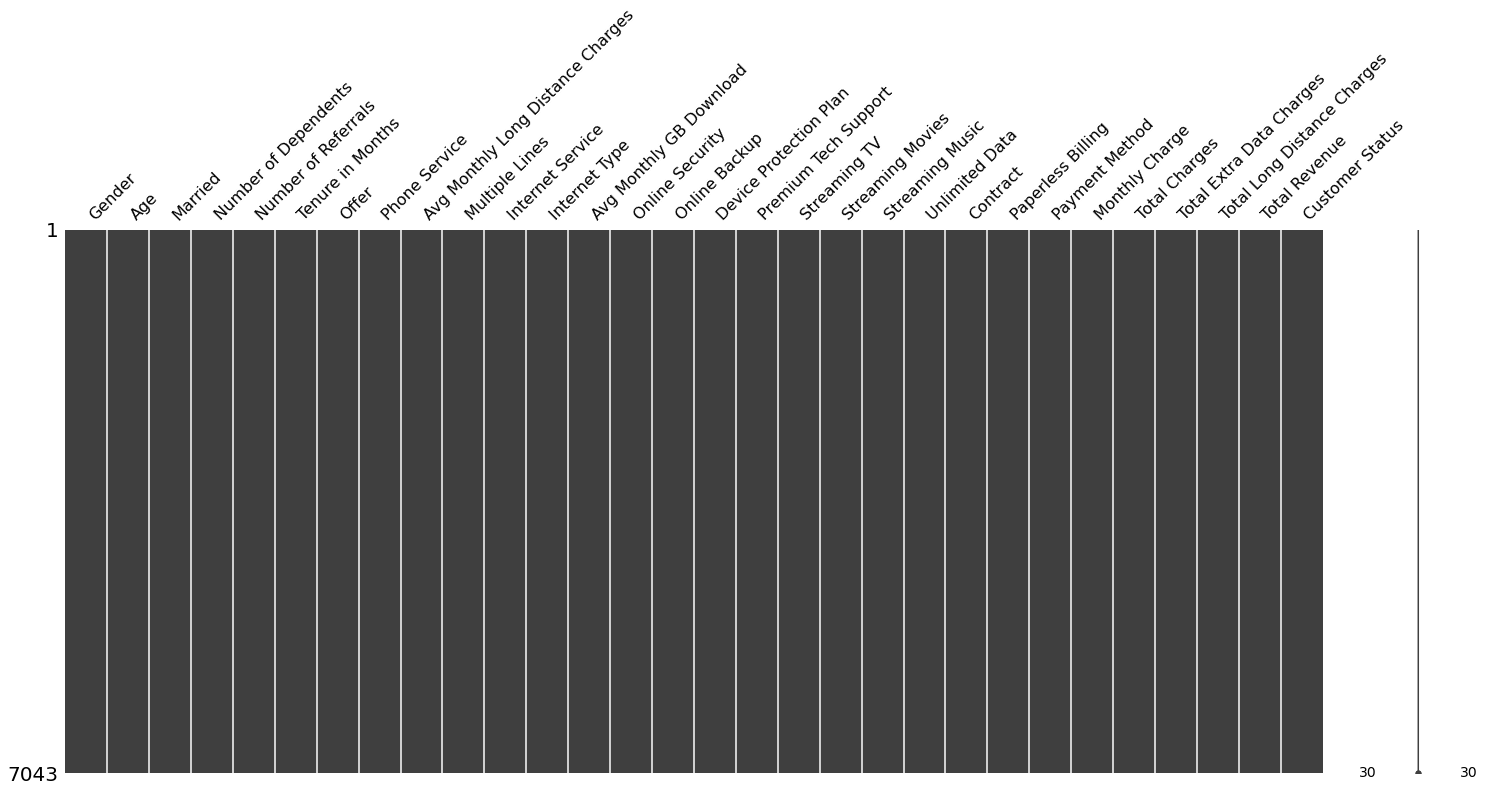

In [12]:
msno.matrix(df)

## Data Visualization

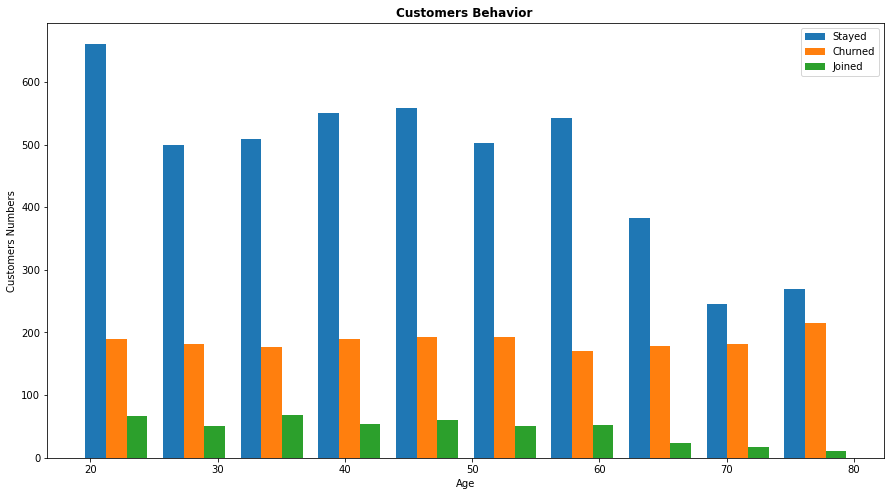

In [13]:
plt.figure(figsize=(15,8))
Customer_Stayed=df[df['Customer Status']=='Stayed'].Age
Customer_Churned=df[df['Customer Status']=='Churned'].Age
Customer_Joined=df[df['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined],label=['Stayed','Churned','Joined'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend()

<AxesSubplot:xlabel='Customer Status'>

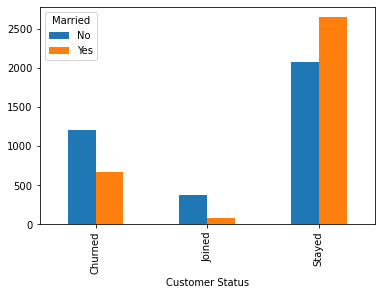

In [14]:
pd.crosstab(df['Customer Status'], df['Married']).plot(kind='bar')

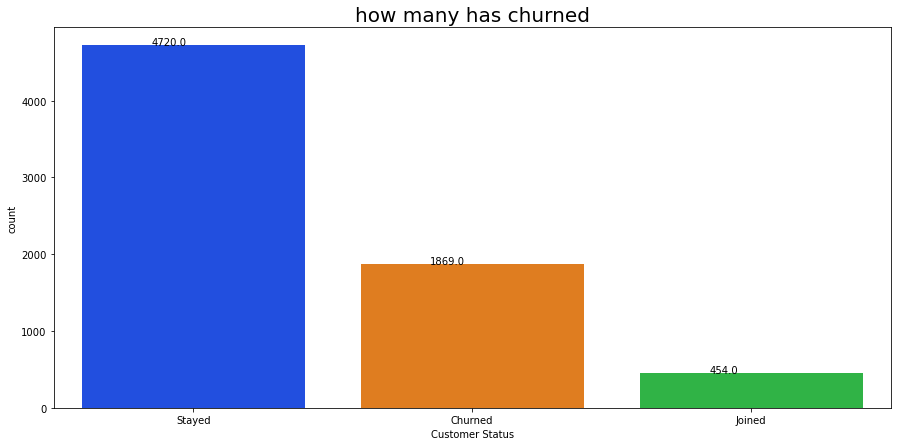

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

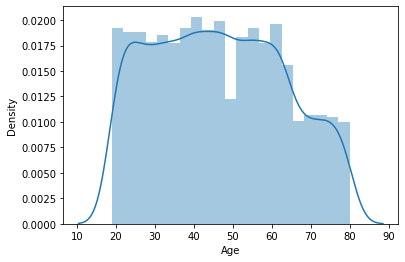

In [15]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=df,x="Customer Status", palette = "bright")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("how many has churned", fontsize = 20)

plt.show()
sns.distplot(df['Age'])

### Encoding Data

In [16]:
label_Encoder = LabelEncoder()

#using label encoder for features with only two unique values
for col in df.columns[0:]:
    if len(list(df[col].unique())) == 2:
        label_Encoder.fit(df[col])
        df[col] = label_Encoder.transform(df[col])
        
#using label encoder for object features  
for col in df.columns[0:]:
    if df[col].dtype == 'object':
        label_Encoder.fit(df[col])
        df[col] = label_Encoder.transform(df[col])

In [17]:
df = pd.get_dummies(data=df, columns=['Offer'])
df

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Offer_0,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5
0,0,37,1,0,2,9,1,42.39,0,1,...,0,381.51,974.81,2,1,0,0,0,0,0
1,1,46,0,0,0,9,1,10.69,1,1,...,10,96.21,610.28,2,1,0,0,0,0,0
2,1,50,0,0,0,4,1,33.65,0,1,...,0,134.60,415.45,0,0,0,0,0,0,1
3,1,78,1,0,1,13,1,27.82,0,1,...,0,361.66,1599.51,0,0,0,0,0,1,0
4,0,75,1,0,3,3,1,7.38,0,1,...,0,22.14,289.54,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,20,0,0,0,13,1,46.68,0,1,...,0,606.84,1349.74,2,0,0,0,0,1,0
7039,1,40,1,0,1,22,1,16.20,1,1,...,0,356.40,2230.10,0,0,0,0,0,1,0
7040,1,22,0,0,0,2,1,18.62,0,1,...,0,37.24,129.99,1,0,0,0,0,0,1
7041,1,21,1,0,5,67,1,2.12,0,1,...,0,142.04,4769.69,2,0,1,0,0,0,0


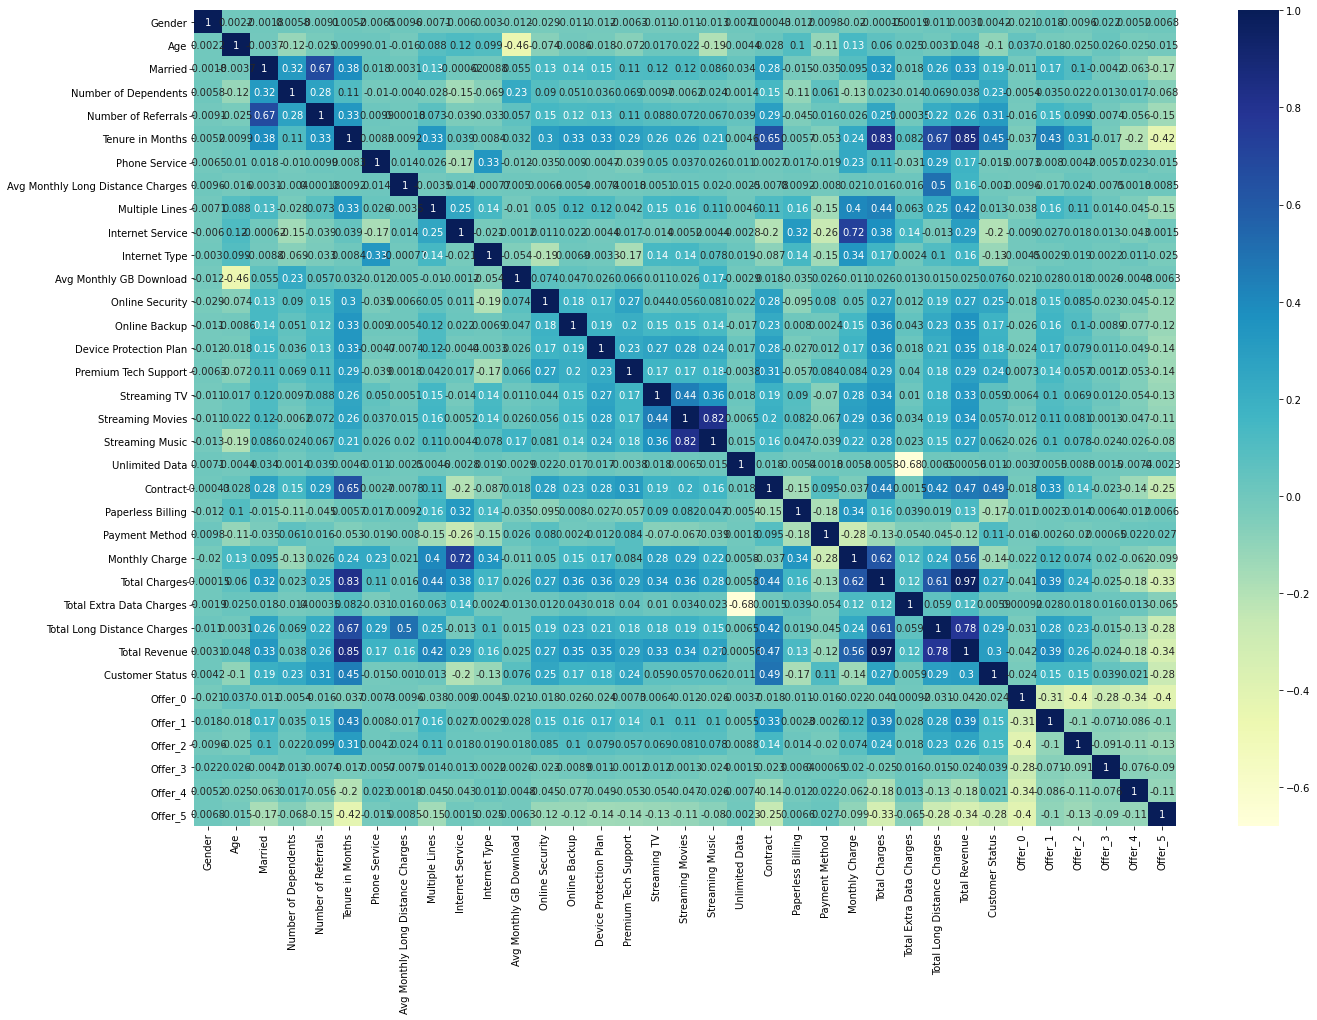

In [18]:
df.corr()
plt.figure(figsize=(22,15))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [19]:
drop_col = ['Customer Status','Internet Service','Total Charges','Monthly Charge','Streaming Movies','Number of Referrals','Total Extra Data Charges',"Total Long Distance Charges"]
x = df.drop(drop_col, axis = 1)
y = df['Customer Status']

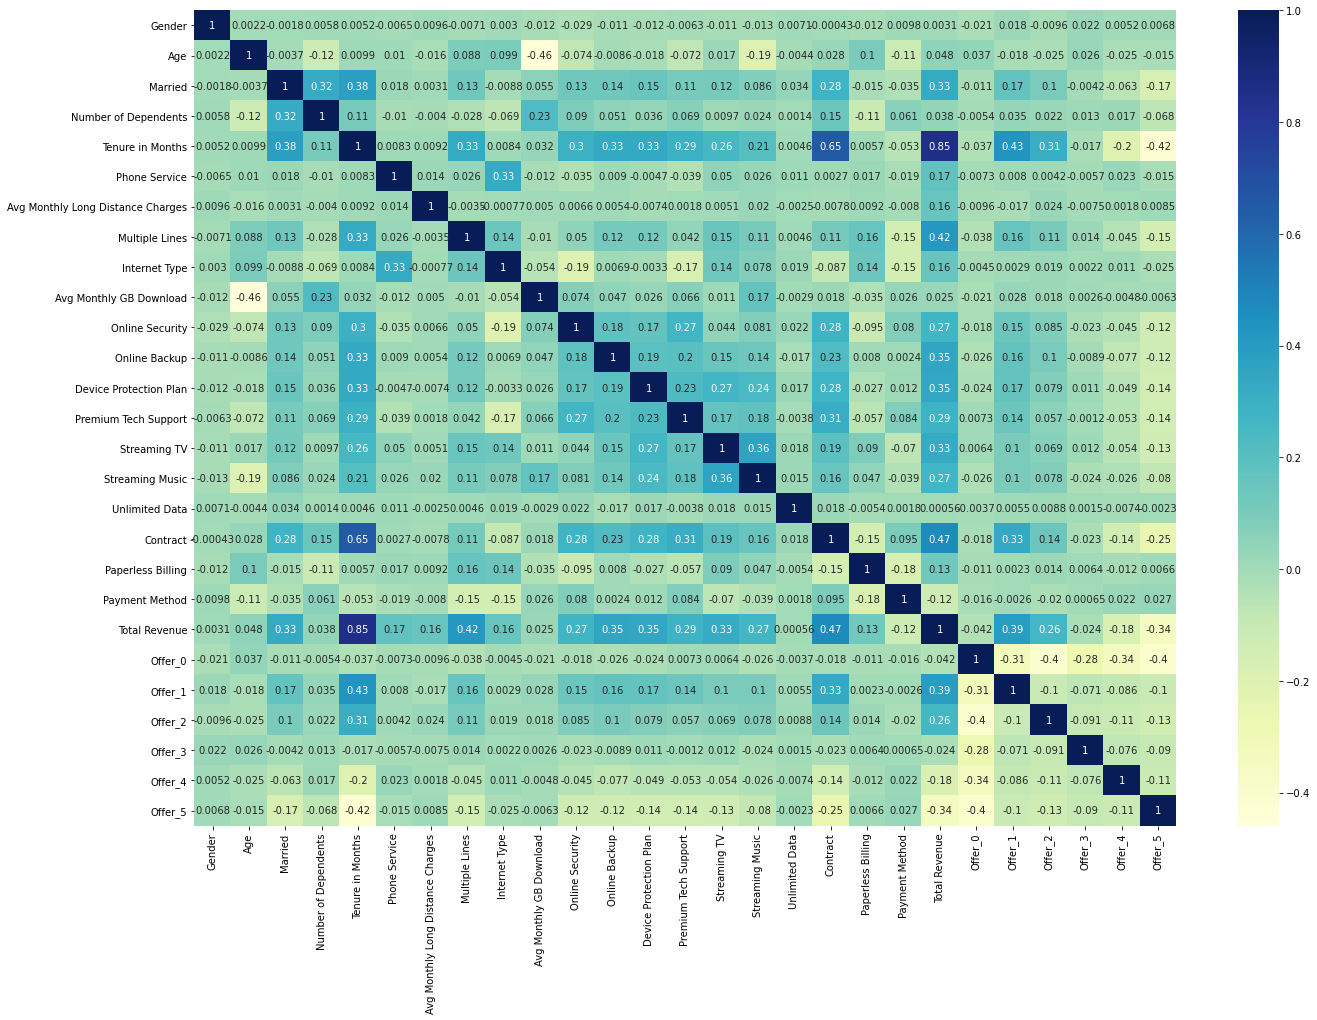

In [20]:
x.corr()
plt.figure(figsize=(22,15))
dataplot = sns.heatmap(x.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int32  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int32  
 3   Number of Dependents               7043 non-null   int64  
 4   Tenure in Months                   7043 non-null   int64  
 5   Phone Service                      7043 non-null   int32  
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   int32  
 8   Internet Type                      7043 non-null   int32  
 9   Avg Monthly GB Download            7043 non-null   float64
 10  Online Security                    7043 non-null   int32  
 11  Online Backup                      7043 non-null   int32

## Splitting our data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)

In [23]:
# col=['Total Charges','Avg Monthly Long Distance Charges','Monthly Charge','Total Revenue',
#      'Tenure in Months','Total Long Distance Charges','Total Extra Data Charges']
#HIGHEST ACCURACY

In [24]:
# scaler = StandardScaler()
# X_train[col] = StandardScaler().fit_transform(X_train[col])
# X_test[col] = StandardScaler().fit_transform(X_test[col])

In [25]:
# cols = ['Age','Avg Monthly Long Distance Charges','Tenure in Months','Avg Monthly GB Download','Total Revenue', 'Total Charges','Monthly Charge', 'Total Extra Data Charges','Total Long Distance Charges']

## Using Standard Scaler For Scaling Our Data

In [26]:
scaler = StandardScaler()
cols = ['Age','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Total Revenue']
X_train[cols] = StandardScaler().fit_transform(X_train[cols])
X_test[cols] = StandardScaler().fit_transform(X_test[cols])

#LAST EDIT

## Decision Tree Model

In [27]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(max_depth = 6, min_samples_split = 5, min_samples_leaf = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=5)

Training Accuracy =  0.8277167739492617
Testing Accuracy =  0.8018171493469619

Classification Report For Test:  
               precision    recall  f1-score   support

           0       0.63      0.59      0.60       456
           1       0.63      0.68      0.65       123
           2       0.88      0.90      0.89      1182

    accuracy                           0.80      1761
   macro avg       0.71      0.72      0.72      1761
weighted avg       0.80      0.80      0.80      1761



C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


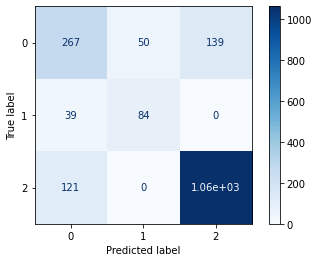

In [28]:
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
print('Training Accuracy = ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy = ', accuracy_score(y_test, y_pred_test))
print("\nClassification Report For Test:  \n",classification_report(y_test,y_pred_test))
disp = plot_confusion_matrix(tree,X_test, y_test, cmap="Blues", values_format=".3g")

# Random forest 

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=10, random_state=0,n_estimators=25)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=0)

Training Accuracy =  0.8987126088602801
Testing Accuracy =  0.8211243611584327

Classification Report For Test:  
               precision    recall  f1-score   support

           0       0.69      0.57      0.62       456
           1       0.73      0.60      0.66       123
           2       0.87      0.94      0.90      1182

    accuracy                           0.82      1761
   macro avg       0.76      0.70      0.73      1761
weighted avg       0.81      0.82      0.81      1761



C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


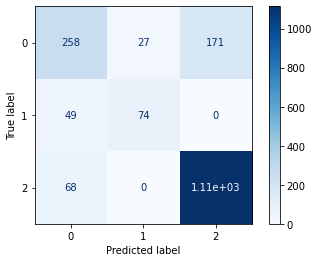

In [30]:
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)
print('Training Accuracy = ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy = ', accuracy_score(y_test, y_pred_test))
print("\nClassification Report For Test:  \n",classification_report(y_test,y_pred_test))
disp = plot_confusion_matrix(forest,X_test, y_test, cmap="Blues", values_format=".3g")

In [31]:
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.metrics import r2_score

# def get_grid_search():
  
#   params = { 
#       "criterion": ['gini', 'entropy'],
#       "max_depth" : list(np.arange(1,11)),
#       "min_samples_split" : list(np.arange(1,10)),
#       "min_samples_leaf" : list(np.arange(1,10))}
#   grid = GridSearchCV(Model, params, scoring = 'accuracy')
#   grid.fit(X_train, y_train)
#   print(grid.best_estimator_)
# get_grid_search()

## Logistic Regression Model

Training Accuracy =  0.8057553956834532
Testing Accuracy =  0.7961385576377058

Classification Report For Test:  
               precision    recall  f1-score   support

           0       0.61      0.61      0.61       456
           1       0.65      0.58      0.61       123
           2       0.88      0.89      0.89      1182

    accuracy                           0.80      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.79      0.80      0.79      1761



C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


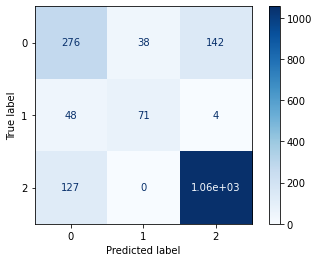

In [32]:
lr = LogisticRegression(max_iter=1000)
fitted = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print('Training Accuracy = ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy = ', accuracy_score(y_test, y_pred_test))
print("\nClassification Report For Test:  \n",classification_report(y_test,y_pred_test))
disp = plot_confusion_matrix(lr,X_test, y_test, cmap="Blues", values_format=".3g")


## KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Training Accuracy =  0.8297993184399849
Testing Accuracy =  0.7745599091425327

Classification Report For Test:  
               precision    recall  f1-score   support

           0       0.57      0.52      0.55       456
           1       0.65      0.49      0.56       123
           2       0.85      0.90      0.88      1182

    accuracy                           0.77      1761
   macro avg       0.69      0.64      0.66      1761
weighted avg       0.76      0.77      0.77      1761



C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


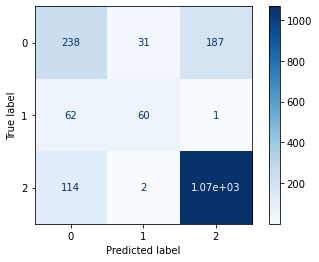

In [34]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
print('Training Accuracy = ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy = ', accuracy_score(y_test, y_pred_test))
print("\nClassification Report For Test:  \n",classification_report(y_test,y_pred_test))
disp = plot_confusion_matrix(knn,X_test, y_test, cmap="Blues", values_format=".3g")

## PCA For Feature Selection 

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
x_pca = pca.fit_transform(x)
x_pca.shape

(7043, 13)

In [36]:
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, random_state = 0)

## Logistic Regression With PCA

In [37]:
lr = LogisticRegression(max_iter=1500)
lr.fit(x_train_pca,y_train)
y_pred_pca = lr.predict(x_test_pca)
y_pred_pca
cm = confusion_matrix(y_test, y_pred_pca)
print(cm)
accuracy_score(y_test, y_pred_pca)

[[ 303   20  133]
 [  53   40   30]
 [ 130    2 1050]]


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7910278250993753

## KNN With PCA

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(n_neighbors=7)

In [39]:
y_pred_pca = knn.predict(x_test_pca)
y_pred_pca
cm = confusion_matrix(y_test, y_pred_pca)
print(cm)
accuracy_score(y_test, y_pred_pca)

[[ 153   25  278]
 [  70   41   12]
 [ 102    6 1074]]


0.720045428733674

## Random Forest With PCA

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=10, random_state=0, n_estimators = 25)
forest.fit(x_train_pca, y_train)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=0)

In [41]:
y_pred_pca = forest.predict(x_test_pca)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_pca)
print(cm)
accuracy_score(y_test, y_pred)

[[ 247   19  190]
 [  58   47   18]
 [  69    6 1107]]


0.7961385576377058

## Transforming Our Target to Binary Class

In [42]:
# if df['Customer Status'] == 1:
#     df.drop(['Customer Status'])
df.drop(df[df['Customer Status'] == 1 ].index, inplace = True)
# 2 for stayed, 0 for churned

In [43]:
df['Customer Status'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       0
3       0
4       0
       ..
7037    0
7038    2
7039    0
7041    2
7042    2
Name: Customer Status, Length: 6589, dtype: int32>

In [44]:
x = df.drop(drop_col, axis = 1)
y = df['Customer Status']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)

## Random forest with Binary Class

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=10, random_state=0,n_estimators=25)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=0)

[[ 290  153]
 [  57 1148]]


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8725728155339806

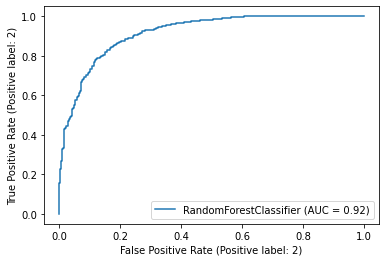

In [66]:
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax = metrics.plot_roc_curve(forest, X_test, y_test)
accuracy_score(y_test, y_pred)

## logistic regression with 2 classes

In [73]:
fitted = lr.fit(X_train, y_train)

In [74]:
y_pred = lr.predict(X_test)

[[ 319  124]
 [ 149 1056]]


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8343446601941747

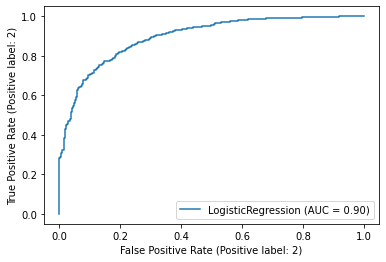

In [75]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax = metrics.plot_roc_curve(lr, X_test, y_test)
accuracy_score(y_test, y_pred)

## Decision Tree with Binary Class

In [76]:
fitted = tree.fit(X_train, y_train)

In [77]:
y_pred = tree.predict(X_test)

[[ 320  123]
 [ 108 1097]]


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8598300970873787

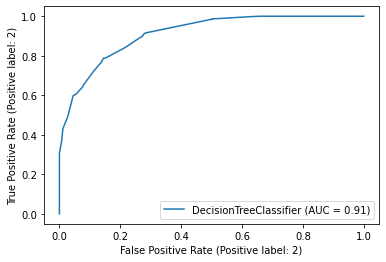

In [78]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax = metrics.plot_roc_curve(tree, X_test, y_test)
accuracy_score(y_test, y_pred)

## KNN With Binary Class

In [79]:
fitted = knn.fit(X_train, y_train)

In [80]:
y_pred = knn.predict(X_test)

[[ 186  257]
 [  95 1110]]


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7864077669902912

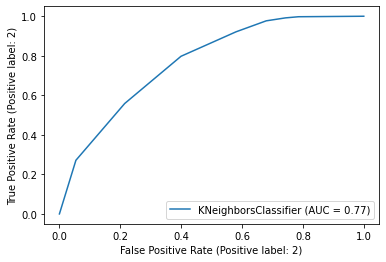

In [81]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax = metrics.plot_roc_curve(knn, X_test, y_test)
accuracy_score(y_test, y_pred)

##### as knn is a classification algorithm so changing from multi-class to binary class wont affect the output much

## SVM Model 

In [56]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state=0)
SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [58]:
y_pred = SVM.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [59]:
print(cm)
accuracy_score(y_test, y_pred)

[[ 265  178]
 [ 106 1099]]


0.8276699029126213

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


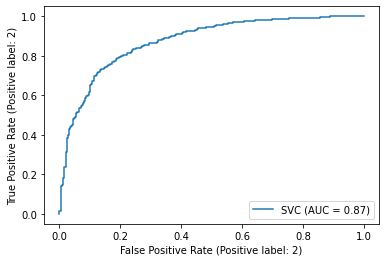

In [60]:
ax = metrics.plot_roc_curve(SVM, X_test, y_test)